# Machine Learning Project 

Baylasan khalid almuqati

# Imports

In [4]:
!pip install imbalanced-learn
%pip install xgboost

In [5]:
# Import needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score


# Data Load

In [6]:
# Read dataset to pandas dataframe
df=pd.read_csv('telecom_churn.csv')
# Preview the first few rows
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


Data Description:

Churn : 1 if customer cancelled service, 0 if not (nominal)                                                                                          
AccountWeeks: number of weeks customer has had active account (nominal)

ContractRenewal: 1 if customer recently renewed contract, 0 if not (nominal)

DataPlan: 1 if customer has data plan, 0 if not (nominal)

DataUsage: gigabytes of monthly data usage (continous)

CustServCalls: number of calls into customer service(nominal)

DayMins:average daytime minutes per month (continous)

DayCalls:average number of daytime calls (nominal)

MonthlyCharge:average monthly bill (continous)

OverageFee:largest overage fee in last 12 months (continous)

RoamMins:average number of roaming minutes (continous)


In [7]:
# Number of rows and columns
df.shape

(3333, 11)

The Data contains 3333 rows and 11 columns

In [8]:
# Percentages of both classes in our target column
df['Churn'].value_counts()

,count
Churn,
0,2850
1,483


False/0/+ve (Did not cancel): 85.53%, True/1/-ve (canceled): 14.47%

In [9]:
# Summary statistics
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


The descriptive statistics display that all the variables are nominal except for ‘DataUsage’ and ‘DayMins' and 'MonthlyCharge'
and 'OverageFee' and 'RoamMins'

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB
None


In [11]:
# Check for missing values
df.isnull().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


The above information shows that there is no missing value in the dataset and all the data has 3333 values with types of integer.

In [12]:
# check for duplicates
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


# Preprocessing

no duplicate values found

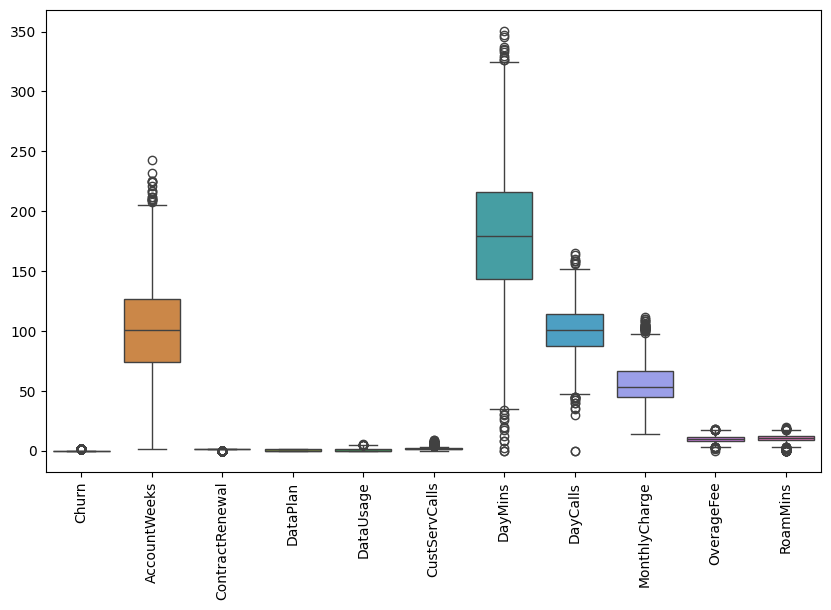

In [13]:
# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=90)
plt.show()

Based on our data, the presence of outliers does not align with the nature of its content

In [14]:
# Function to count outliers for each numerical feature
def count_outliers(df):
    outlier_counts = {}

    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count values outside the IQR range
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]

    # Convert to DataFrame
    outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])
    return outlier_df.sort_values(by='Outlier Count', ascending=False)

outlier_summary = count_outliers(df)
print(outlier_summary)

            Feature  Outlier Count
0             Churn            483
2   ContractRenewal            323
5     CustServCalls            267
10         RoamMins             46
8     MonthlyCharge             34
6           DayMins             25
9        OverageFee             24
7          DayCalls             23
1      AccountWeeks             18
4         DataUsage             11
3          DataPlan              0



Feature: Churn
Churn
0    2850
1     483
Name: count, dtype: int64
Churn
0    85.5
1    14.5
Name: proportion, dtype: float64


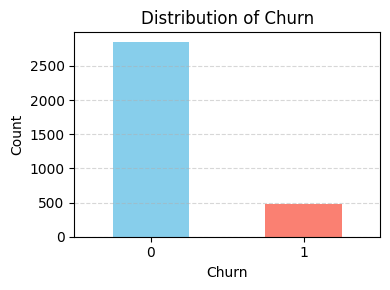


Feature: ContractRenewal
ContractRenewal
1    3010
0     323
Name: count, dtype: int64
ContractRenewal
1    90.3
0     9.7
Name: proportion, dtype: float64


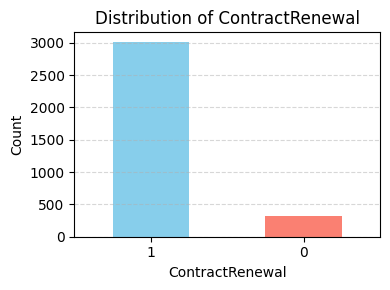


Feature: DataPlan
DataPlan
0    2411
1     922
Name: count, dtype: int64
DataPlan
0    72.3
1    27.7
Name: proportion, dtype: float64


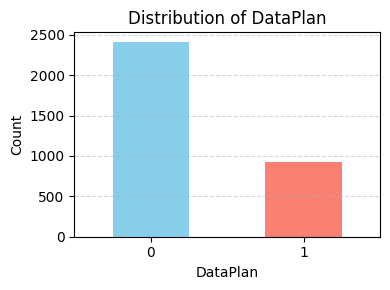

In [15]:
#to see if binary features suffer imbalanced data or no
# List your binary features (based on your dataset)
binary_cols = ['Churn', 'ContractRenewal', 'DataPlan']

# Loop through each and show value counts and bar plot
for col in binary_cols:
    print(f"\nFeature: {col}")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True).round(3) * 100)  # Show % distribution

    # Bar plot
    plt.figure(figsize=(4, 3))
    df[col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

as we can see some of the binary features suffer from imbalanced data ( will be handles during modeling phase)

# Cleaning

In [16]:
# Define a function to cap outliers using IQR
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

In [17]:
# Apply capping to continuous features only (based on your actual data)
columns_to_cap = ['DayMins', 'MonthlyCharge', 'OverageFee', 'CustServCalls', 'RoamMins']
for col in columns_to_cap:
    cap_outliers(df, col)

In [18]:
# Function to count outliers for each numerical feature
def count_outliers(df):
    outlier_counts = {}

    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count values outside the IQR range
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]

    # Convert to DataFrame
    outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])
    return outlier_df.sort_values(by='Outlier Count', ascending=False)

outlier_summary = count_outliers(df)
print(outlier_summary)

            Feature  Outlier Count
0             Churn            483
2   ContractRenewal            323
7          DayCalls             23
1      AccountWeeks             18
4         DataUsage             11
5     CustServCalls              0
3          DataPlan              0
6           DayMins              0
8     MonthlyCharge              0
9        OverageFee              0
10         RoamMins              0


These features were capped because they showed high-value outliers and those outliers could have negatively impacted the machine learning models , we did not capped Churn, ContractRenewal, and DataPlan because they are binary so they don’t have outliers ( balanced or imbalanced only) , and for Features like DayCalls, AccountWeeks or DataUseage because it showed normal distribution or we can say acceptable range of variation.

# EDA After Cleaning

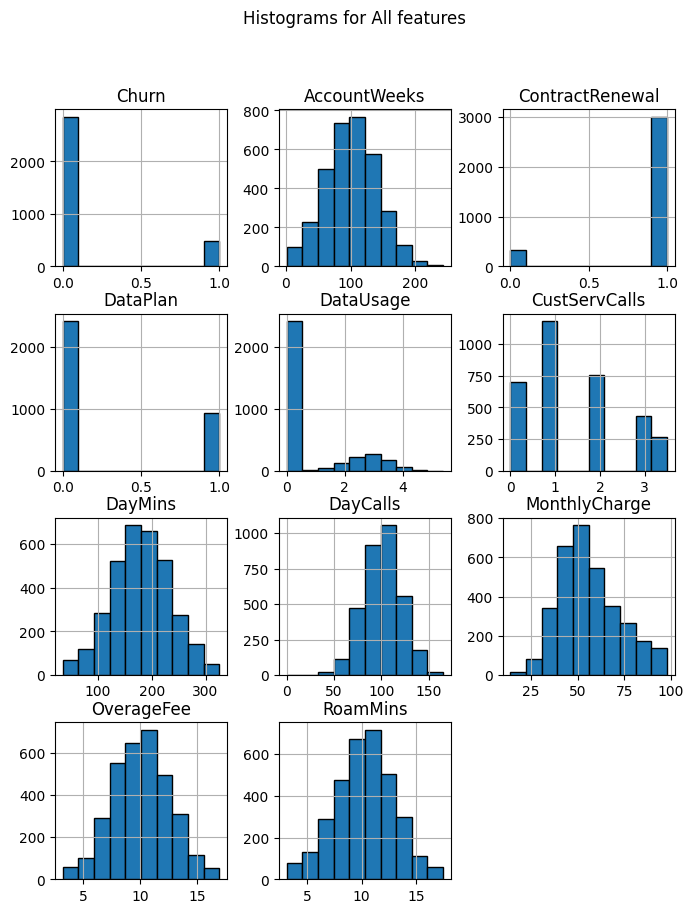

In [19]:
# display histogram to show feature distribution
df.hist(bins=10, edgecolor='black', figsize=(8, 10))

# Show plot
plt.suptitle('Histograms for All features')
plt.show()

In [20]:
# Set seaborn style for better visuals
sns.set(style='whitegrid')

In [21]:
# Dataset shape and types
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Shape: (3333, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   float64
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 286.6 KB
None

Summary Statistics:
             Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806  

Churn Distribution (counts):
 Churn
0    2850
1     483
Name: count, dtype: int64

Churn Distribution (%):
 Churn
0    85.51
1    14.49
Name: proportion, dtype: float64


<ipython-input-22-74b5ecd453bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


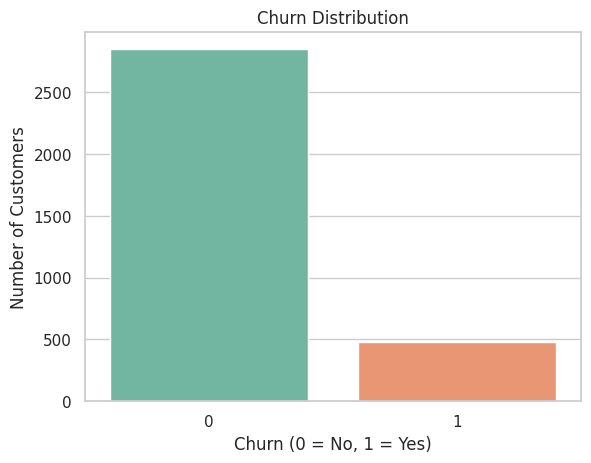

In [22]:
# Churn class counts and percentages
print("Churn Distribution (counts):\n", df['Churn'].value_counts())
print("\nChurn Distribution (%):\n", (df['Churn'].value_counts(normalize=True) * 100).round(2))

# Bar plot
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

<ipython-input-23-35bec0148924>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set3')


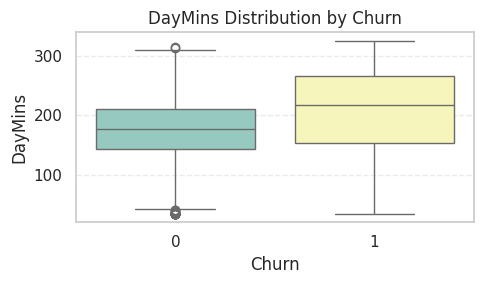

<ipython-input-23-35bec0148924>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set3')


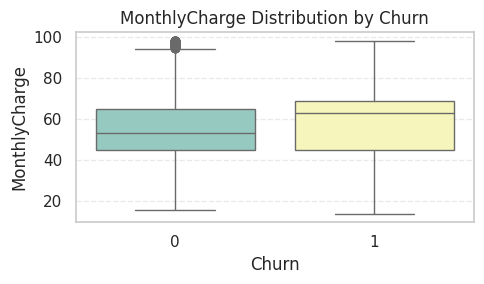

<ipython-input-23-35bec0148924>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set3')


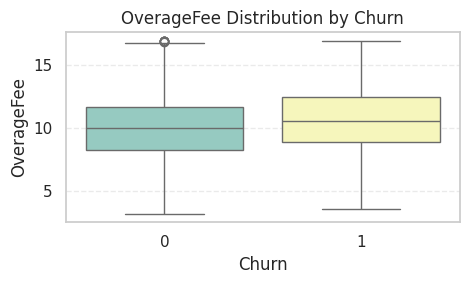

<ipython-input-23-35bec0148924>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set3')


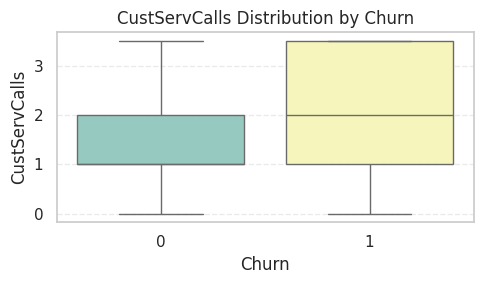

<ipython-input-23-35bec0148924>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set3')


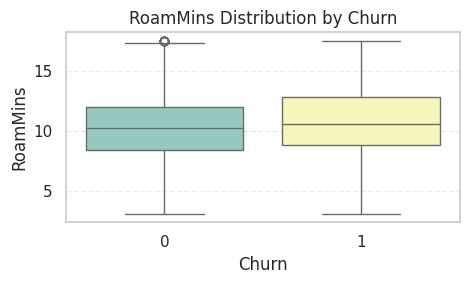

<ipython-input-23-35bec0148924>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set3')


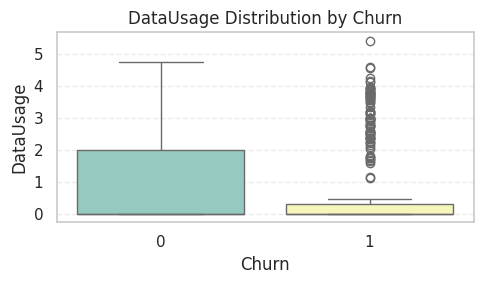

In [23]:
# Features to analyze
numerical_cols = ['DayMins', 'MonthlyCharge', 'OverageFee', 'CustServCalls', 'RoamMins', 'DataUsage']

# Loop through features and plot boxplots grouped by Churn
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='Churn', y=col, data=df, palette='Set3')
    plt.title(f'{col} Distribution by Churn')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

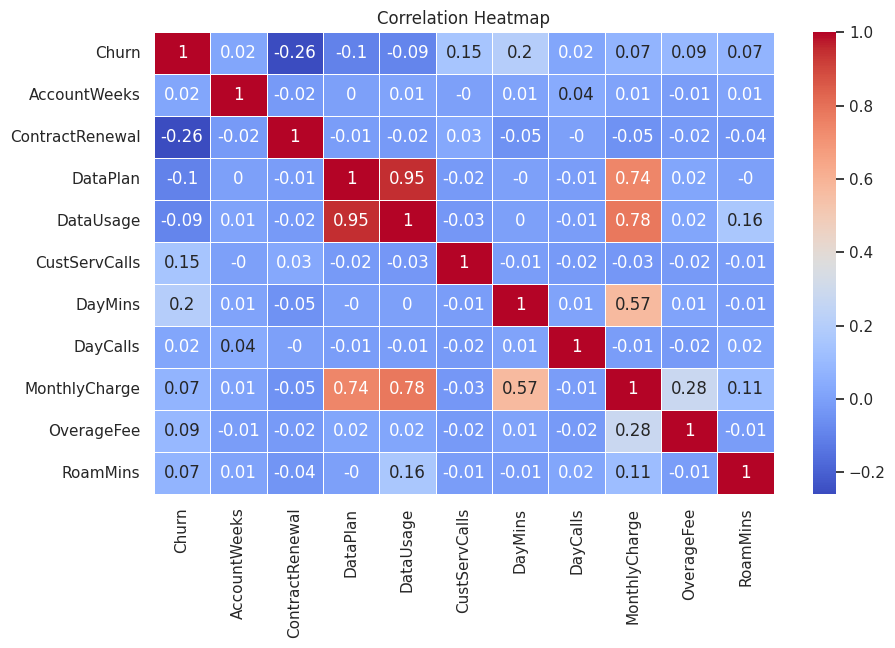

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows that churn is negatively correlated with contract renewal and slightly positively correlated with customer service calls, meaning customers who don’t renew or contact support more often are more likely to leave. Also, data plan and data usage are strongly related, and both are linked to higher monthly charges. Most other features have weak or no strong correlation with churn


Churn Rate by ContractRenewal:
 ContractRenewal
0    0.42
1    0.11
Name: Churn, dtype: float64


<ipython-input-25-f9737e02d75c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='pastel')


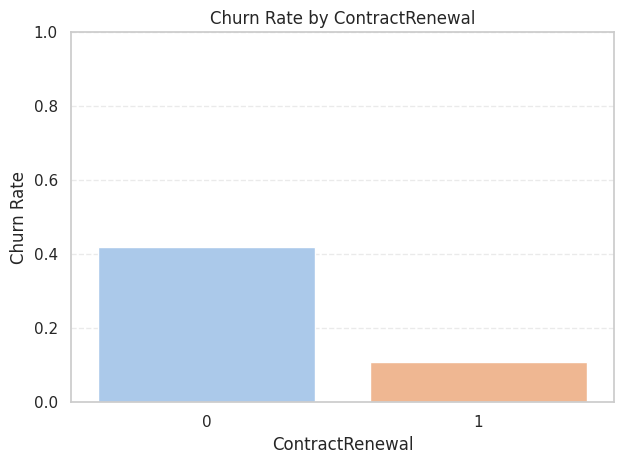


Churn Rate by DataPlan:
 DataPlan
0    0.17
1    0.09
Name: Churn, dtype: float64


<ipython-input-25-f9737e02d75c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='pastel')


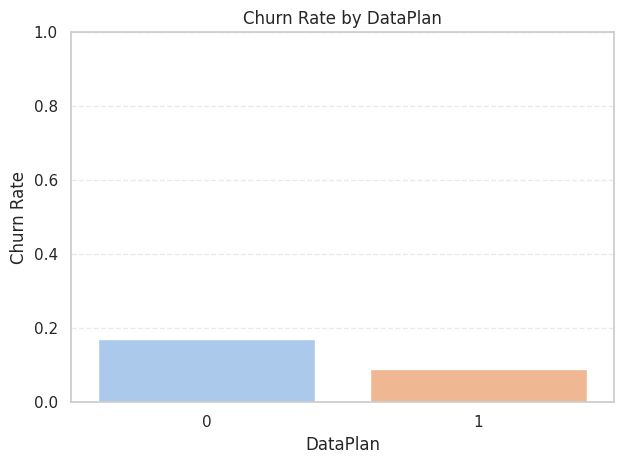

In [25]:
# Binary features to analyze
binary_cols = ['ContractRenewal', 'DataPlan']

for col in binary_cols:
    churn_rate = df.groupby(col)['Churn'].mean().round(2)
    print(f"\nChurn Rate by {col}:\n", churn_rate)

    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='pastel')
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Churn Rate')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

In [26]:
# Split features and target
from sklearn.utils.class_weight import compute_class_weight
#selected_columns = ['ContractRenewal', 'CustServCalls', 'DayMins', 'OverageFee', 'RoamMins','AccountWeeks','DayCalls','DataPlan','DataUsage','MonthlyCharge' ]
X = df.drop(["Churn"], axis = 1)
#X = df[selected_columns]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
# نحولها لقاموس {label: weight}
cw_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)



**AI Ethics**

We applied AI ethics by ensuring no sensitive customer data was used. We also prevented data leakage by applying SMOTE only on training data, ensuring fairness. Our models were evaluated on generalization, not memorization, reducing bias toward majority classes.


---



---




# Machine Learning

#### Building the Models

In [27]:
#Defualt
scale_pos_weight = cw_dict[0] / cw_dict[1]
svm_model = SVC(class_weight=cw_dict)
rf_model = RandomForestClassifier(class_weight=cw_dict)
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight)
stacking_model = StackingClassifier(
    estimators=[
        ('svm', svm_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(class_weight=cw_dict),
    passthrough=False,
    n_jobs=None
)

## Model Evaluation

### Using Hold-out

**Stacking Classifier (Hybrid Model)**

In [28]:
stacking_model = StackingClassifier(
    estimators=[
        ('svm', svm_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(class_weight=cw_dict),
    passthrough=False,
    n_jobs=None
)



stacking_model.fit(X_train_scaled, y_train)
stacking_pred = stacking_model.predict(X_test_scaled)

In [29]:
y_train_pred = stacking_model.predict(X_train_scaled)
y_pred = stacking_model.predict(X_test_scaled)

print('Training Accuracy :', accuracy_score(y_train, y_train_pred))
print('Test Accuracy     :', accuracy_score(y_test, y_pred))

Training Accuracy : 0.9786196549137285
Test Accuracy     : 0.8830584707646177


In [30]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[517  53]
 [ 25  72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       570
           1       0.58      0.74      0.65        97

    accuracy                           0.88       667
   macro avg       0.76      0.82      0.79       667
weighted avg       0.90      0.88      0.89       667



In [31]:
cv_scores = cross_val_score(stacking_model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validation scores: [0.91154423 0.90554723 0.92953523 0.92192192 0.92042042]
Average accuracy: 0.9177938057998027


**Support Vector Machine (SVM)**

In [32]:
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

In [33]:
y_train_pred = svm_model.predict(X_train_scaled)
y_pred = svm_model.predict(X_test_scaled)

print('Training Accuracy :', accuracy_score(y_train, y_train_pred))
print('Test Accuracy     :', accuracy_score(y_test, y_pred))

Training Accuracy : 0.8687171792948237
Test Accuracy     : 0.8245877061469266


In [34]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[474  96]
 [ 21  76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       570
           1       0.44      0.78      0.57        97

    accuracy                           0.82       667
   macro avg       0.70      0.81      0.73       667
weighted avg       0.88      0.82      0.84       667



**Random Forest**

In [35]:
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

In [36]:
y_train_pred = rf_model.predict(X_train_scaled)
y_pred = rf_model.predict(X_test_scaled)

print('Training Accuracy :', accuracy_score(y_train, y_train_pred))
print('Test Accuracy     :', accuracy_score(y_test, y_pred))

Training Accuracy : 1.0
Test Accuracy     : 0.9250374812593704


In [37]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[558  12]
 [ 38  59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       570
           1       0.83      0.61      0.70        97

    accuracy                           0.93       667
   macro avg       0.88      0.79      0.83       667
weighted avg       0.92      0.93      0.92       667



In [38]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validation scores: [0.92653673 0.93103448 0.94302849 0.92342342 0.94444444]
Average accuracy: 0.9336935136035585


**XGBoost**

In [39]:
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

In [40]:
y_train_pred = xgb_model.predict(X_train_scaled)
y_pred = xgb_model.predict(X_test_scaled)

print('Training Accuracy :', accuracy_score(y_train, y_train_pred))
print('Test Accuracy     :', accuracy_score(y_test, y_pred))

Training Accuracy : 0.9714928732183046
Test Accuracy     : 0.9325337331334332


In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[564   6]
 [ 39  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       570
           1       0.91      0.60      0.72        97

    accuracy                           0.93       667
   macro avg       0.92      0.79      0.84       667
weighted avg       0.93      0.93      0.93       667



In [42]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validation scores: [0.92803598 0.92653673 0.94302849 0.92942943 0.94594595]
Average accuracy: 0.934595314955135


### GridSearshCV

In [43]:
# 1. Parameter grids
svm_params = {
  'kernel': ['linear', 'rbf', 'poly'],
  'C': [0.1, 1, 10, 100]
}


rf_params = {
   'n_estimators': [32, 50, 100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

xgb_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [0.5, 1]
}


stacking_params = {
    'final_estimator__C': [0.001, 0.01, 0.1],
    'final_estimator__penalty': ['l2'],
    'final_estimator__solver': ['lbfgs']
}



# 2. GridSearchCV for each model
# SVM
svm_grid = GridSearchCV(
    SVC(class_weight=cw_dict, probability=True, random_state=42),
    svm_params, cv=3, scoring='roc_auc', n_jobs=-1
)
svm_grid.fit(X_train_scaled, y_train)
best_svm = svm_grid.best_estimator_

rf_grid = GridSearchCV(
    RandomForestClassifier(class_weight=cw_dict, random_state=42),
    rf_params, cv=3, scoring='roc_auc', n_jobs=-1
)
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_



xgb_grid = GridSearchCV(
    XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        random_state=42
    ),
    xgb_params, cv=3, scoring='roc_auc', n_jobs=-1
)
xgb_grid.fit(X_train_scaled, y_train)
best_xgb = xgb_grid.best_estimator_

stacking_model = StackingClassifier(
    estimators=[
        ('svm', best_svm),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    final_estimator=LogisticRegression(),
    passthrough=False,
    n_jobs=-1
)


stacking_grid = GridSearchCV(estimator=stacking_model,
 param_grid=stacking_params, cv=3, scoring='roc_auc', n_jobs=-1)
stacking_grid.fit(X_train_scaled, y_train)
best_stacking = stacking_grid.best_estimator_

# 3. Evaluate all best models
models = {
    "SVM Tuned": best_svm,
    "RandomForest Tuned": best_rf,
    "XGBoost Tuned": best_xgb,
    "Stacking Tuned": best_stacking
}

results = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Accuracy Gap": [],
    "F1 Score": [],
    "Precision": [],
    "Recall": []
}

for name, model in models.items():
    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    gap = train_acc - test_acc

    results["Model"].append(name)
    results["Train Accuracy"].append(round(train_acc, 4))
    results["Test Accuracy"].append(round(test_acc, 4))
    results["Accuracy Gap"].append(round(gap, 4))
    results["F1 Score"].append(round(f1_score(y_test, test_preds), 4))
    results["Precision"].append(round(precision_score(y_test, test_preds), 4))
    results["Recall"].append(round(recall_score(y_test, test_preds), 4))

# 4. Display results
pd.DataFrame(results)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:27:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Train Accuracy,Test Accuracy,Accuracy Gap,F1 Score,Precision,Recall
0,SVM Tuned,0.8687,0.8246,0.0441,0.5651,0.4419,0.7835
1,RandomForest Tuned,0.9730,0.9130,0.0599,0.6882,0.7191,0.6598
2,XGBoost Tuned,0.9329,0.9115,0.0213,0.5816,0.9318,0.4227
3,Stacking Tuned,0.9584,0.9280,0.0303,0.7037,0.8769,0.5876


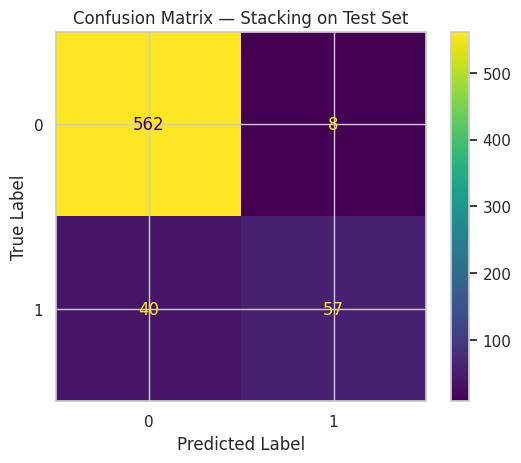

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Make predictions with your SVC
#    (replace `svm_model` with whatever you named your fitted SVC,
#     and `X_test_scaled` with your scaled test features)
y_pred_svc = best_stacking.predict(X_test_scaled)

# 2. Use your true test labels
y_true = y_test

# 3. Compute and plot
cm = confusion_matrix(y_true, y_pred_svc, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])   # or ['No Churn','Churn']
disp.plot(values_format='d')                      # integer counts

plt.title("Confusion Matrix — Stacking on Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


TP: 57 customers the model predicted would churn and who actually did churn.

TN: 562 customers the model predicted would not churn and who indeed did not churn.

FP: 8 customers the model predicted would churn but who did not churn.

FN: 40 customers the model predicted would not churn but who actually did churn.

Save as model file

In [47]:
import joblib
joblib.dump(best_stacking, 'stacking_model.pkl')

['stacking_model.pkl']

In [49]:
from google.colab import files
files.download('stacking_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion